# Experimenting with the color spaces

In this Notebook I explore various colorspaces and different normalization approaches.

# Setup

In [5]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import numpy as np
from image_utils import print_image_summary

In [6]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [7]:
# image on which I will test the approaches
path = 'images/train_3/wario/wario_land_3_img_1.jpg'

# Default RGB

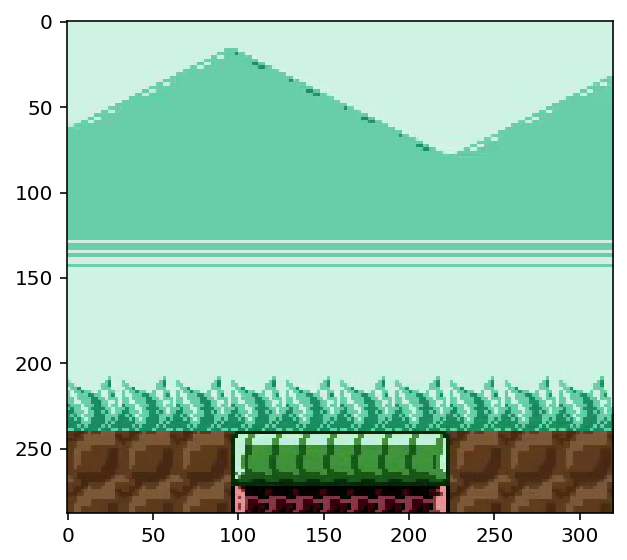

In [8]:
img = imread(path)
imshow(img)

In [9]:
print_image_summary(img, ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (288, 320, 3)
Channels:
R : min=0.0000, max=252.0000
G : min=0.0000, max=255.0000
B : min=0.0000, max=246.0000


In [10]:
img[0, 0, :]

array([206, 243, 226], dtype=uint8)

## Default Grayscale

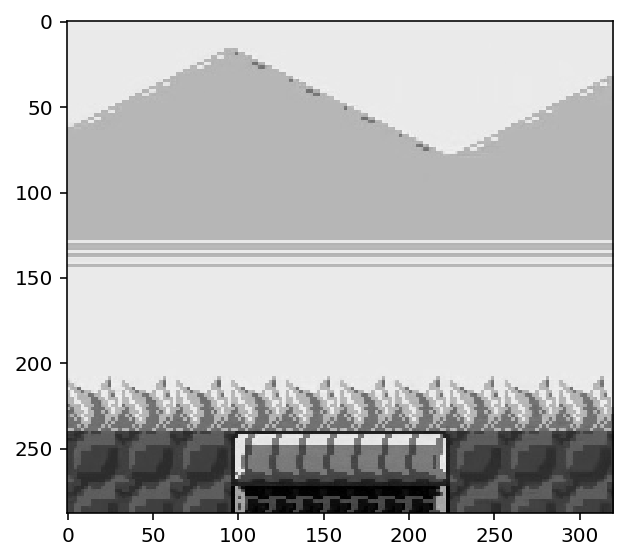

In [11]:
img = imread(path, as_gray=True)
imshow(img)

In [12]:
img[0, 0]

0.9173011764705882

## rgb2gray Grayscale

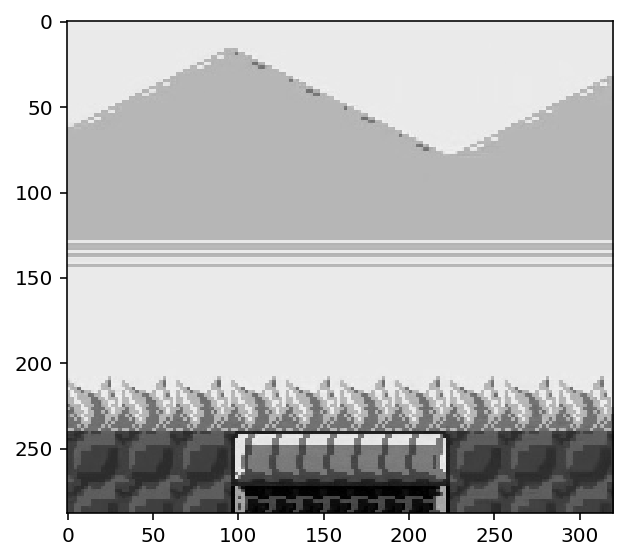

In [13]:
img = imread(path, as_gray=True)
img_gray = rgb2gray(img)
imshow(img_gray)

In [14]:
img_gray[0, 0]

0.9173011764705882

## rgb2lab Lab

### Approach 1

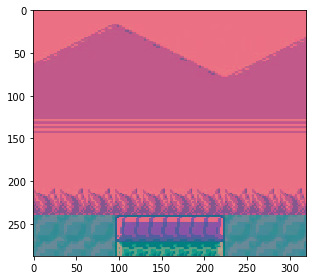

In [25]:
img = imread(path)
img_lab = rgb2lab(img)
img_lab_scaled = (img_lab + [0, 128, 128]) / [100, 255, 255]
imshow(img_lab_scaled)

In [26]:
print_image_summary(img_lab_scaled, ['L', 'a', 'b'])

--------------
Image Details:
--------------
Image dimensions: (288, 320, 3)
Channels:
L : min=0.0000, max=0.9715
a : min=0.3031, max=0.6941
b : min=0.4682, max=0.7036


In [10]:
img_lab_scaled[0, 0, :]

array([0.92888388, 0.44239402, 0.51844948])

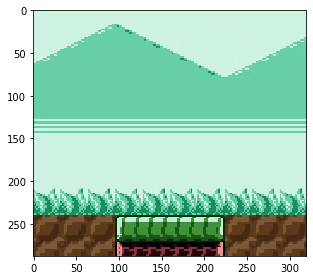

In [11]:
img_reverted = lab2rgb(img_lab_scaled * [100, 255, 255] - [0, 128, 128])
imshow(img_reverted)

In [12]:
img_reverted[0, 0, :] * 255

array([206., 243., 226.])

### Approach 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


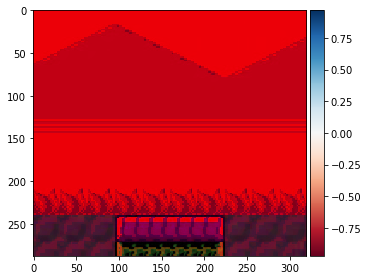

In [27]:
img = imread(path)
img_lab = rgb2lab(img)
img_lab_scaled = (img_lab + [0, 0, 0]) / [100, 128, 128]
imshow(img_lab_scaled)

In [28]:
print_image_summary(img_lab_scaled, ['L', 'a', 'b'])

--------------
Image Details:
--------------
Image dimensions: (288, 320, 3)
Channels:
L : min=0.0000, max=0.9715
a : min=-0.3962, max=0.3827
b : min=-0.0673, max=0.4017


In [14]:
img_lab_scaled[0, 0, :]

array([ 0.92888388, -0.11866817,  0.03284858])

In [16]:
img_reverted = lab2rgb(img_lab_scaled * [100, 128, 128])

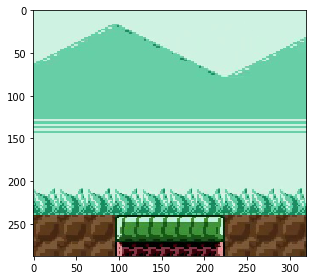

In [17]:
imshow(img_reverted)

In [18]:
img_reverted[0, 0, :] * 255

array([206., 243., 226.])

### Approach 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


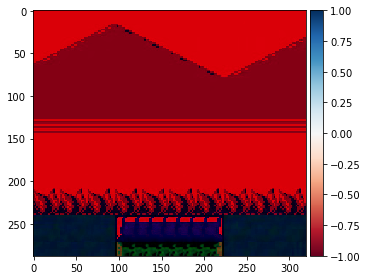

In [29]:
img = imread(path)
img_lab = rgb2lab(img)
img_lab[:, :, 0] = 2 * img_lab[:, :, 0] / 100 - 1
img_lab[:, :, 1:] = img_lab[:, :, 1:] / 127
imshow(img_lab)

In [30]:
print_image_summary(img_lab, ['L', 'a', 'b'])

--------------
Image Details:
--------------
Image dimensions: (288, 320, 3)
Channels:
L : min=-1.0000, max=0.9429
a : min=-0.3993, max=0.3858
b : min=-0.0678, max=0.4049


In [20]:
img_lab[0, 0, :]

array([ 0.85776776, -0.11960257,  0.03310723])